In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('drive/MyDrive/diabetes/diabetic_data.csv', na_values=['?', 'NaN'])
df['readmitted'].replace({'>30': 'YES', '<30': 'YES'}, inplace=True)
df['readmitted'].replace({'YES': '1', 'NO': '0'}, inplace=True)


<ipython-input-2-1bbafecd295f>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('drive/MyDrive/diabetes/diabetic_data.csv', na_values=['?', 'NaN'])


In [ ]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

filling missing weight, race and dropping diag_1, diag_2, diag_3 if missing

payer_code isnt relevant since insurance != diabetes
and medical_specialty can be observed deeper if I combine the datasets we have


In [ ]:
grouped_weight = df.groupby(['age', 'race', 'gender'])['weight'].value_counts(normalize=True).unstack().fillna(0)
grouped_weight

weight                               >200    [0-25)  [100-125)  [125-150)  \
age      race            gender                                             
[0-10)   Caucasian       Male    0.000000  0.666667   0.000000   0.000000   
         Other           Male    0.000000  1.000000   0.000000   0.000000   
[10-20)  Caucasian       Male    0.000000  0.000000   0.000000   0.000000   
                         Female  0.000000  0.000000   0.000000   0.000000   
         AfricanAmerican Male    0.000000  0.000000   0.000000   0.000000   
                         Female  0.000000  0.000000   0.000000   0.000000   
[20-30)  Caucasian       Male    0.000000  0.000000   0.080000   0.000000   
                         Female  0.000000  0.026316   0.157895   0.026316   
         AfricanAmerican Male    0.000000  0.000000   0.000000   0.000000   
                         Female  0.000000  0.000000   0.000000   0.000000   
[30-40)  Caucasian       Male    0.000000  0.000000   0.156250   0.156250   
                         Female  0.000000  0.000000   0.073171   0.073171   
         Other           Male    0.000000  0.000000   0.000000   0.000000   
         AfricanAmerican Male    0.000000  0.333333   0.333333   0.333333   
                         Female  0.166667  0.000000   0.166667   0.000000   
[40-50)  Caucasian       Male    0.000000  0.029412   0.274510   0.127451   
                         Female  0.000000  0.010526   0.326316   0.084211   
         Other           Male    0.000000  0.000000   0.000000   0.000000   
                         Female  0.000000  0.000000   0.000000   0.000000   
         AfricanAmerican Male    0.000000  0.166667   0.083333   0.083333   
                         Female  0.000000  0.000000   0.333333   0.222222   
[50-60)  Caucasian       Male    0.000000  0.009390   0.319249   0.107981   
                         Female  0.000000  0.004444   0.222222   0.075556   
         Other           Male    0.000000  0.000000   0.000000   0.500000   
                         Female  0.000000  0.000000   0.142857   0.142857   
         AfricanAmerican Male    0.000000  0.076923   0.461538   0.000000   
                         Female  0.000000  0.000000   0.357143   0.000000   
         Asian           Male    0.000000  0.000000   0.000000   0.000000   
                         Female  0.000000  0.000000   0.000000   0.000000   
[60-70)  Caucasian       Male    0.002915  0.014577   0.332362   0.061224   
                         Female  0.003322  0.023256   0.209302   0.033223   
         Other           Male    0.000000  0.000000   0.000000   0.000000   
                         Female  0.000000  0.000000   0.000000   0.000000   
         AfricanAmerican Male    0.000000  0.000000   0.388889   0.055556   
                         Female  0.000000  0.000000   0.230769   0.000000   
         Asian           Female  0.000000  0.000000   0.000000   0.000000   
[70-80)  Caucasian       Male    0.000000  0.011390   0.255125   0.029613   
                         Female  0.000000  0.016129   0.117512   0.018433   
         Other           Male    0.000000  0.000000   0.250000   0.000000   
                         Female  0.000000  0.000000   0.000000   0.000000   
         AfricanAmerican Male    0.000000  0.400000   0.000000   0.000000   
                         Female  0.000000  0.000000   0.000000   0.000000   
         Asian           Male    0.000000  0.000000   0.000000   0.000000   
                         Female  0.000000  0.000000   0.000000   0.000000   
[80-90)  Caucasian       Male    0.000000  0.008811   0.105727   0.017621   
                         Female  0.000000  0.013746   0.034364   0.010309   
         Other           Female  0.000000  0.000000   0.000000   0.000000   
         Asian           Male    0.000000  0.000000   0.000000   0.000000   
[90-100) Caucasian       Male    0.000000  0.000000   0.000000   0.000000   
                         Female  0.000000  0.000000   0.000000   0.000000

In [ ]:
mapping = {
    ('[0-10)', 'Caucasian', 'Male'): '[0-25)',
    ('[0-10)', 'Other', 'Male'): '[0-25)',
    ('[0-10)', 'Caucasian', 'Female'): '[0-25)',
    ('[0-10)', 'Other', 'Female'): '[0-25)',
    ('[10-20)', 'Caucasian', 'Male'): '[50-75)',
    ('[10-20)', 'Caucasian', 'Female'): '[50-75)',
    ('[10-20)', 'AfricanAmerican', 'Female'): '[50-75)',
    ('[10-20)', 'AfricanAmerican', 'Male'): '[35-50)',
    ('[20-30)', 'Caucasian', 'Male'): '[50-75)',
    ('[20-30)', 'AfricanAmerican', 'Male'): '[50-75)',
    ('[20-30)', 'Caucasian', 'Female'): '[50-75)',
    ('[20-30)', 'AfricanAmerican', 'Female'): '[75-100)',
    ('[30-40)', 'Caucasian', 'Male'): '[50-75)',
    ('[30-40)', 'Other', 'Male'): '[50-75)',
    ('[30-40)', 'AfricanAmerican', 'Male'): '[100-125)',
    ('[30-40)', 'Other', 'Female'): '[50-75)',
    ('[30-40)', 'Caucasian', 'Female'): '[125-100)',
    ('[30-40)', 'AfricanAmerican', 'Female'): '[75-100)',
    ('[40-50)', 'Caucasian', 'Male'): '[75-100)',
    ('[40-50)', 'Other', 'Male'): '[75-100)',
    ('[40-50)', 'AfricanAmerican', 'Male'): '[100-125)',
    ('[40-50)', 'Other', 'Female'): '[75-100)',
    ('[40-50)', 'Caucasian', 'Female'): '[25-50)',
    ('[40-50)', 'AfricanAmerican', 'Female'): '[100-125)',
    ('[50-60)', 'Caucasian', 'Male'): '[75-100)',
    ('[50-60)', 'Other', 'Male'): '[75-100)',
    ('[50-60)', 'AfricanAmerican', 'Male'): '[100-125)',
    ('[50-60)', 'Asian', 'Male'): '[50-75)',
    ('[50-60)', 'Caucasian', 'Female'): '[125-150)',
    ('[50-60)', 'Other', 'Female'): '[50-75)',
    ('[50-60)', 'AfricanAmerican', 'Female'): '[100-125)',
    ('[50-60)', 'Asian', 'Female'): '[50-75)',
    ('[60-70)', 'Caucasian', 'Male'): '[75-100)',
    ('[60-70)', 'Other', 'Male'): '[50-75)',
    ('[60-70)', 'AfricanAmerican', 'Male'): '[125-150)',
    ('[60-70)', 'Asian', 'Male'):'[75-100)',
    ('[60-70)', 'Caucasian', 'Female'): '[75-100)',
    ('[60-70)', 'Asian', 'Female'):'[75-100)',
    ('[60-70)', 'Other', 'Female'): '[75-100)',
    ('[60-70)', 'AfricanAmerican', 'Female'): '[75-100)',
    ('[70-80)', 'Caucasian', 'Male'): '[75-100)',
    ('[70-80)', 'Other', 'Male'): '[75-100)',
    ('[70-80)', 'AfricanAmerican', 'Male'): '[75-100)',
    ('[70-80)', 'Asian', 'Male'): '[75-100)',
    ('[70-80)', 'Caucasian', 'Female'): '[75-100)',
    ('[70-80)', 'Other', 'Female'): '[75-100)',
    ('[70-80)', 'AfricanAmerican', 'Female'): '[75-100)',
    ('[70-80)', 'Asian', 'Female'): '[50-75)',
    ('[80-90)', 'Caucasian', 'Male'): '[75-100)',
    ('[80-90)', 'Other', 'Male'): '[50-75)',
    ('[80-90)', 'Caucasian', 'Female'): '[50-75)',
    ('[80-90)', 'Other', 'Female'): '[50-75)',
    ('[80-90)', 'Asian', 'Male'): '[50-75)',
    ('[80-90)', 'Asian', 'Female'): '[50-75)',
    ('[90-100)', 'Caucasian', 'Male'): '[75-100)',
    ('[90-100)', 'Caucasian', 'Female'): '[50-75)',
    ('[90-100)', 'AfricanAmerican', 'Female'): '[75-100)',
    ('[90-100)', 'AfricanAmerican', 'Male'): '[75-100)'
}

missing_weight = df[df['weight'].isnull()]

def map_weights(row):
    key = (row['age'], row['race'], row['gender'])
    return mapping.get(key, np.nan)

missing_weight['weight'] = missing_weight.apply(map_weights, axis=1)

df.update(missing_weight)

df['weight'].fillna('[75-100)', inplace=True)
df['race'].fillna('Caucasian', inplace=True)
df

<ipython-input-5-2591900cac4a>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_weight['weight'] = missing_weight.apply(map_weights, axis=1)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392.0,8222157.0,Caucasian,Female,[0-10),[0-25),6.0,25.0,1.0,1.0,...,No,No,No,No,No,No,No,No,No,0
1,149190.0,55629189.0,Caucasian,Female,[10-20),[50-75),1.0,1.0,7.0,3.0,...,No,Up,No,No,No,No,No,Ch,Yes,1
2,64410.0,86047875.0,AfricanAmerican,Female,[20-30),[75-100),1.0,1.0,7.0,2.0,...,No,No,No,No,No,No,No,No,Yes,0
3,500364.0,82442376.0,Caucasian,Male,[30-40),[50-75),1.0,1.0,7.0,2.0,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680.0,42519267.0,Caucasian,Male,[40-50),[75-100),1.0,1.0,7.0,1.0,...,No,Steady,No,No,No,No,No,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548.0,100162476.0,AfricanAmerican,Male,[70-80),[75-100),1.0,3.0,7.0,3.0,...,No,Down,No,No,No,No,No,Ch,Yes,1
101762,443847782.0,74694222.0,AfricanAmerican,Female,[80-90),[75-100),1.0,4.0,5.0,5.0,...,No,Steady,No,No,No,No,No,No,Yes,0
101763,443854148.0,41088789.0,Caucasian,Male,[70-80),[75-100),1.0,1.0,7.0,1.0,...,No,Down,No,No,No,No,No,Ch,Yes,0
101764,443857166.0,31693671.0,Caucasian,Female,[80-90),[50-75),2.0,3.0,7.0,10.0,...,No,Up,No,No,No,No,No,Ch,Yes,0


| age group | race         | male     | female   |
|-----------|--------------|----------|----------|
| 0-10      | Caucasian    | 0-25     |          |
|           | Other        | 0-25     |          |
| 10-20     | Caucasian    | 50-75    | 50-75    |
|           | African Amer.| 35-50    | 50-75    |
| 20-30     | Caucasian    | 50-75    | 50-75    |
|           | African Amer.| 50-75    | 75-100   |
| 30-40     | Caucasian    | 50-75    | 125-150  |
|           | Other        | 50-75    |          |
|           | African Amer.| 100-125  | 75-100   |
| 40-50     | Caucasian    | 75-100   | 25-50    |
|           | Other        | 75-100   |          |
|           | African Amer.| 100-125  | 100-125  |
| 50-60     | Caucasian    | 75-100   | 125-150  |
|           | Other        | 75-100   | 50-75    |
|           | African Amer.| 100-125  | 100-125  |
|           | Asian        | 50-75    | 50-75    |
| 60-70     | Caucasian    | 75-100   | 75-100   |
|           | Other        | 50-75    | 75-100   |
|           | African Amer.| 125-150  | 75-100   |
|           | Asian        |          | 50-75    |
| 70-80     | Caucasian    | 75-100   | 75-100   |
|           | Other        | 75-100   | 75-100   |
|           | African Amer.| 75-100   | 75-100   |
|           | Asian        | 75-100   | 50-75    |
| 80-90     | Caucasian    | 75-100   | 50-75    |
|           | Other        |          | 50-75    |
|           | Asian        | 50-75    |          |
| 90-100    | Caucasian    | 75-100   | 50-75    |
|           | African Amer.|          | 50-75    |


In [ ]:
df['diag_1'] = df.groupby(['age', 'gender', 'race'])['diag_1'].fillna(method='ffill')
df['diag_2'] = df.groupby(['age', 'gender', 'race'])['diag_1'].fillna(method='ffill')
df['diag_3'] = df.groupby(['age', 'gender', 'race'])['diag_1'].fillna(method='ffill')

In [ ]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [ ]:
df = df.drop(['payer_code', 'medical_specialty'], axis=1)
print(df.shape)
df.columns

(101766, 48)


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

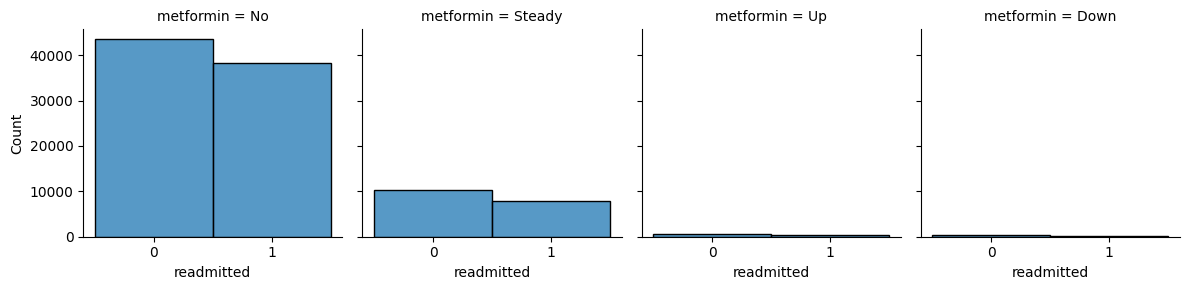

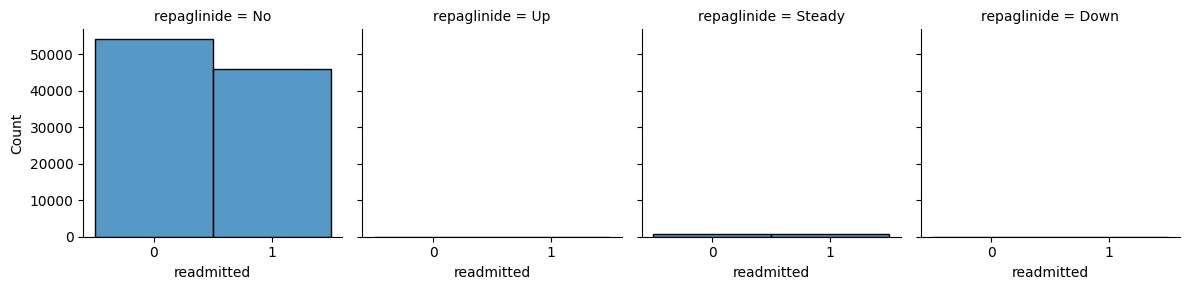

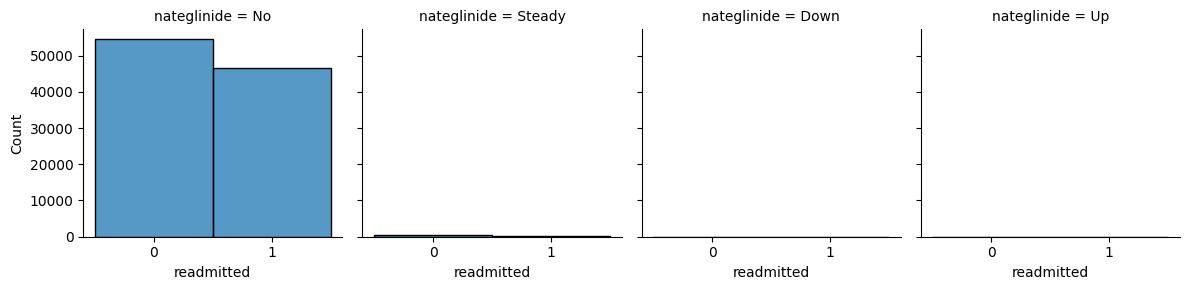

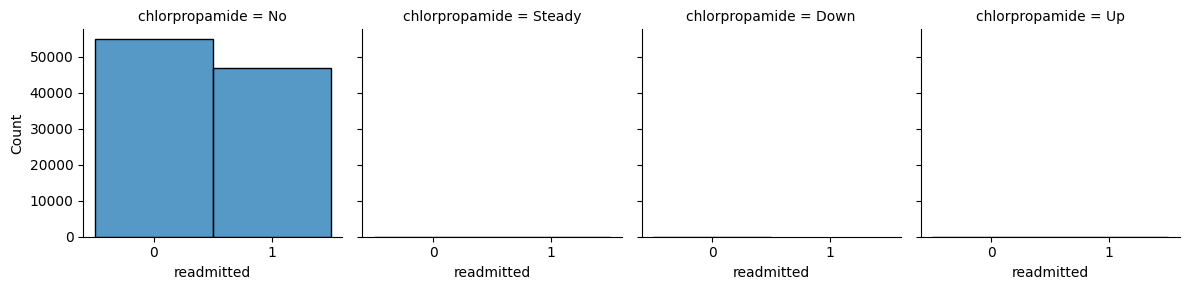

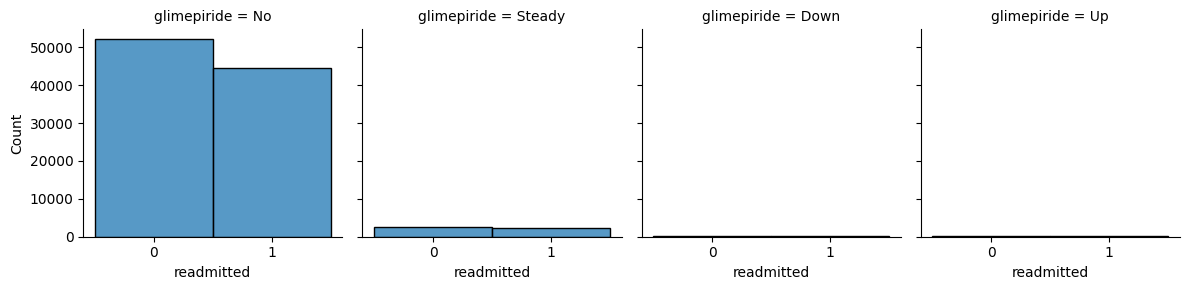

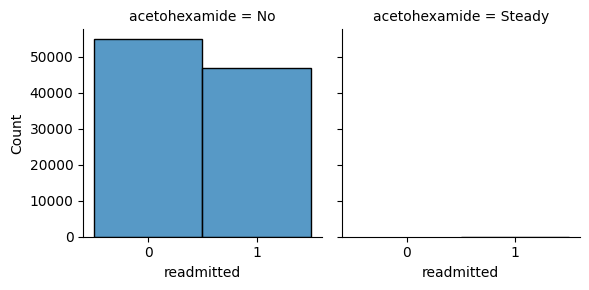

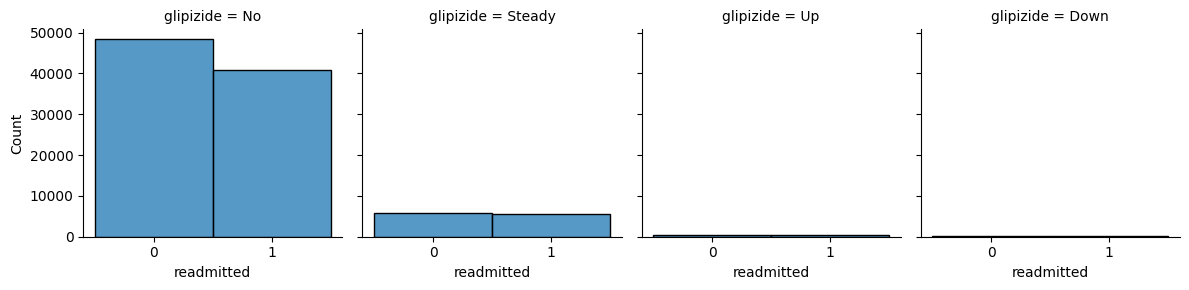

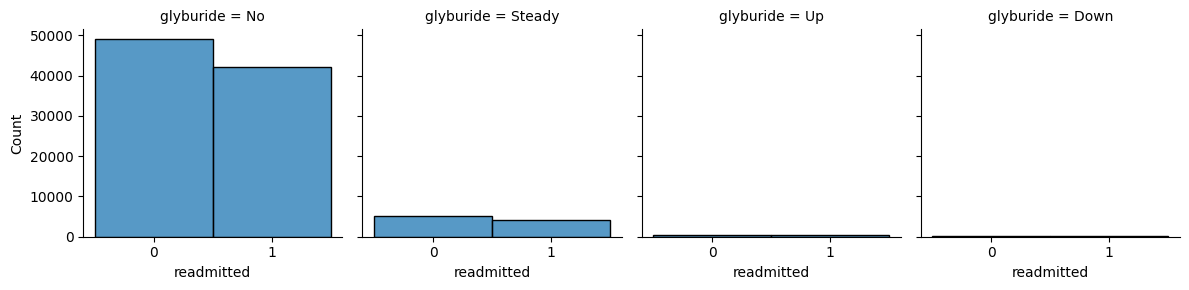

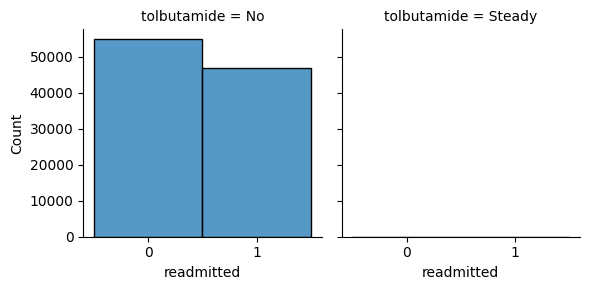

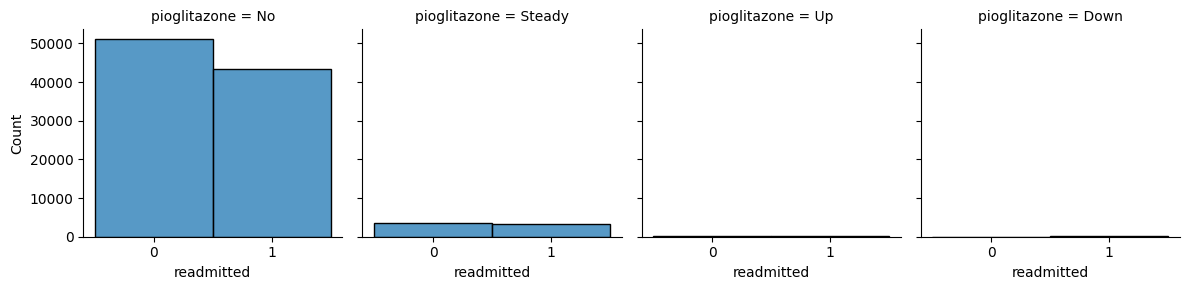

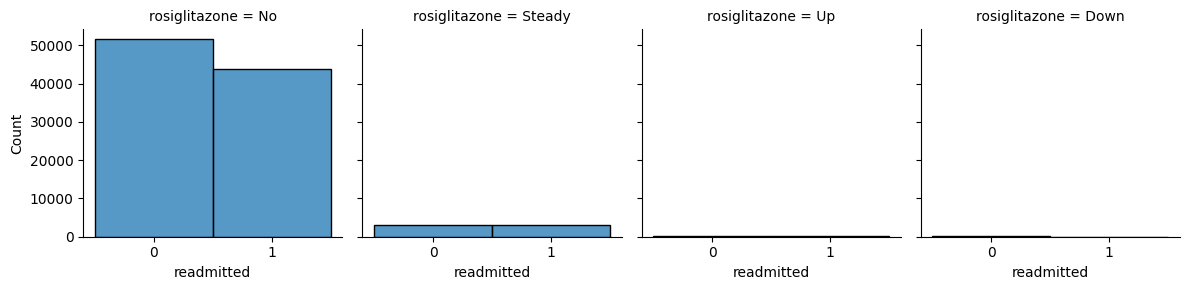

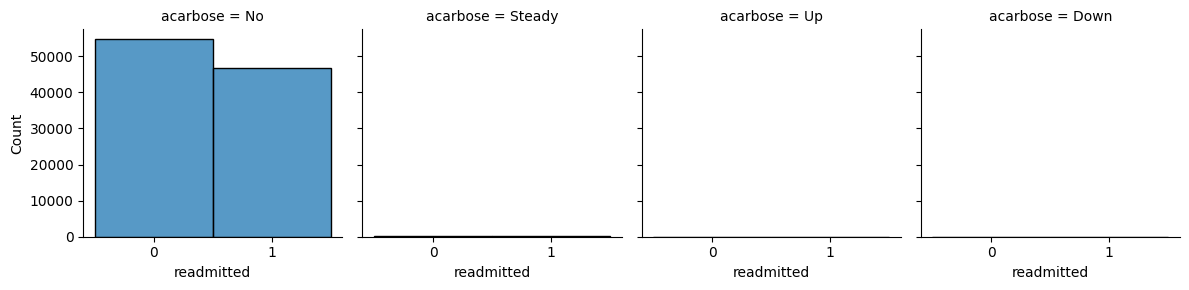

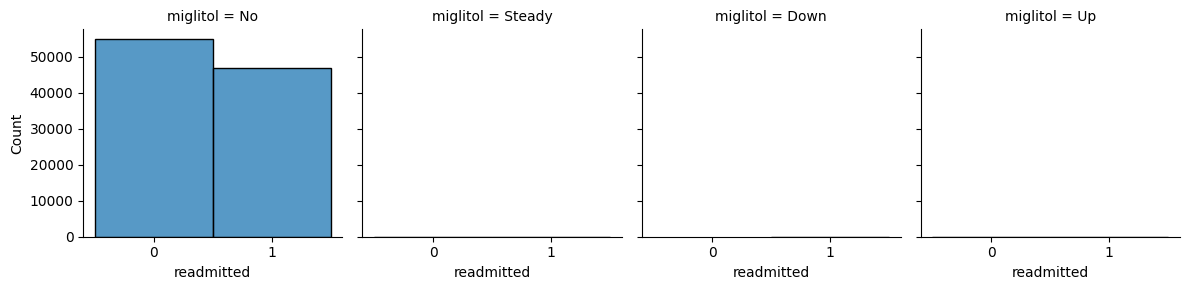

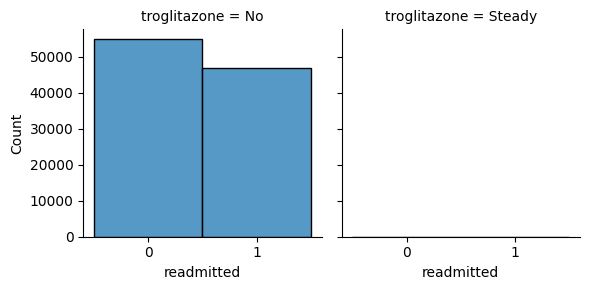

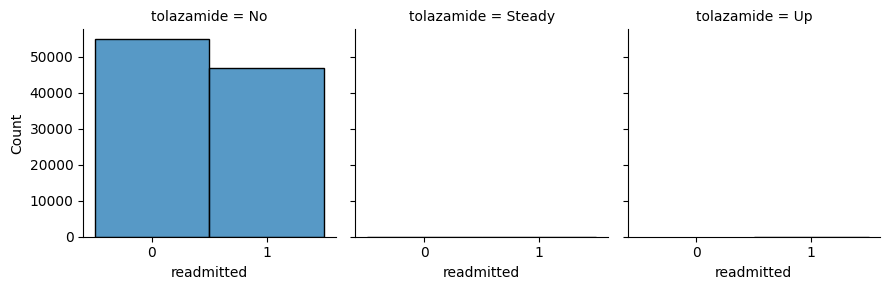

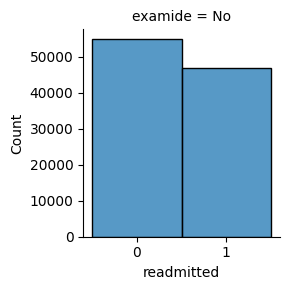

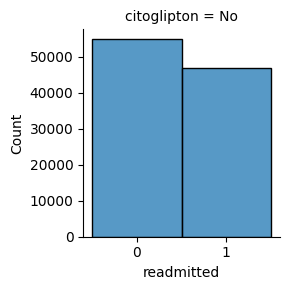

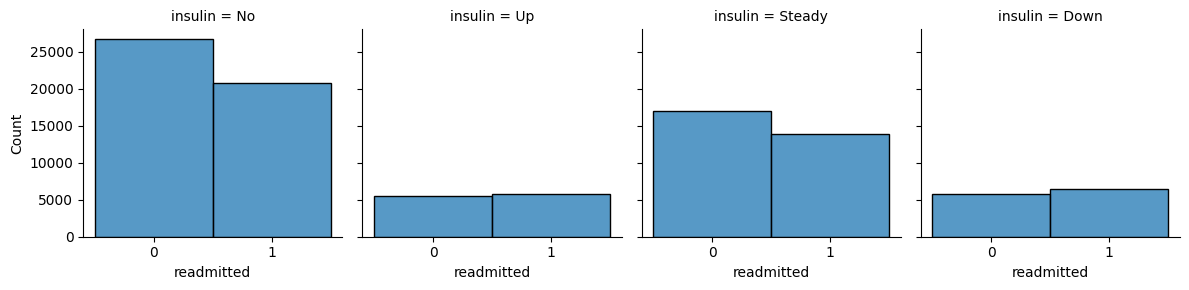

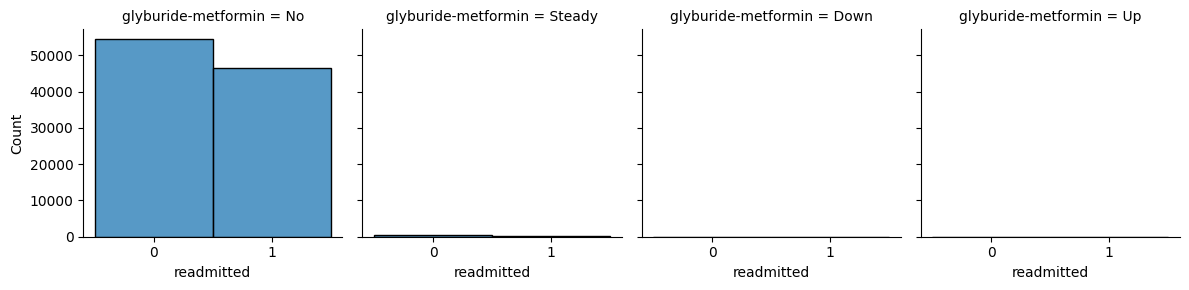

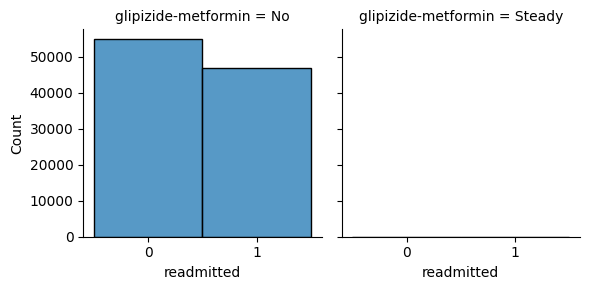

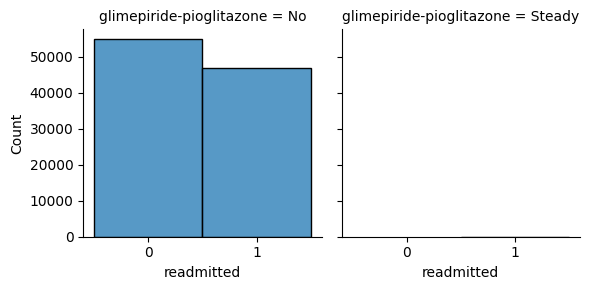

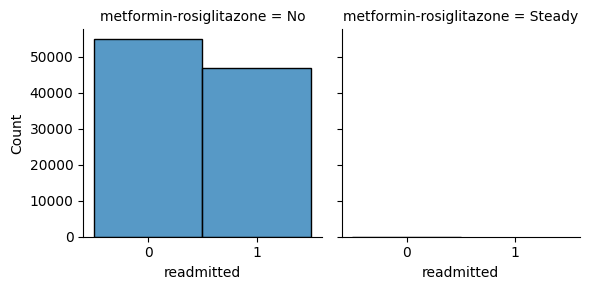

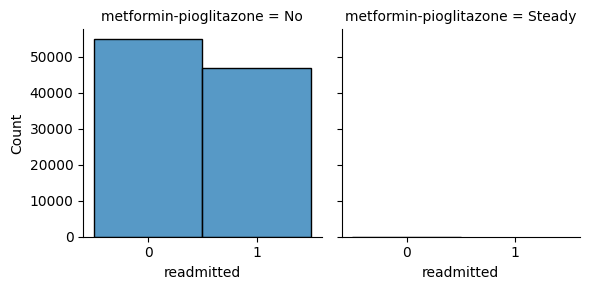

In [ ]:
medication_columns = [
    'metformin', 'repaglinide', 'nateglinide',
    'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
    'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
    'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
    'insulin', 'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone'
]

for column in medication_columns:
    g = sns.FacetGrid(df, col=column)
    g.map(sns.histplot, "readmitted")
    plt.show()

In [ ]:
df = df.drop(columns = ['acetohexamide', 'tolbutamide', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
                   'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                   'metformin-pioglitazone'], axis=1)

In [ ]:
df.nunique()

encounter_id                101766
patient_nbr                  71518
race                             5
gender                           3
age                             10
weight                          11
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         716
diag_2                         716
diag_3                         716
number_diagnoses                16
max_glu_serum                    4
A1Cresult                        4
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride                      4
glipizide                        4
glyburide           

Conclusion:
Nodes:

    Patient Nodes:
        patient_nbr, race, gender, age, weight, payer_code, etc.
        Each unique patient number (patient_nbr) represents a distinct patient node, with associated demographic information (race, gender, age, etc.), medical history (payer_code), and other attributes.

    Medical Entity Nodes:
        diag_1, diag_2, diag_3, medical_specialty, etc.
        Nodes representing medical diagnoses (diag_1, diag_2, diag_3) or medical specialties (medical_specialty) can be separate nodes. Each unique diagnosis code or specialty represents a node in the graph.

    Medication Nodes:
        metformin, repaglinide, insulin, etc.
        Nodes representing different medications, where each unique medication becomes a node in the graph.

    Procedure Nodes:
        num_procedures, information related to procedures performed.
        Nodes representing different procedures performed on patients.

    Lab Test Nodes:
        num_lab_procedures, information about lab tests conducted.
        Nodes representing various lab tests performed on patients.

    Admission/Discharge Nodes:
        admission_type_id, discharge_disposition_id, admission_source_id.
        Nodes representing different admission types, discharge dispositions, and sources of admission.

Edges:

    Patient-Related Edges:
        Edges connecting patient nodes to their demographic attributes, medical history, and admission details.

    Diagnosis-Related Edges:
        Edges connecting patient nodes to their diagnoses (diag_1, diag_2, diag_3).

    Medication-Related Edges:
        Edges connecting patient nodes to the medications they have been prescribed or have taken (metformin, repaglinide, etc.).

    Procedure and Lab Test Edges:
        Edges connecting patient nodes to the procedures (num_procedures) and lab tests (num_lab_procedures) they have undergone.

    Admission-Related Edges:
        Edges connecting patient nodes to their admission type, discharge disposition, and admission source.

In [ ]:
df.dtypes

encounter_id                float64
patient_nbr                 float64
race                         object
gender                       object
age                          object
weight                       object
admission_type_id           float64
discharge_disposition_id    float64
admission_source_id         float64
time_in_hospital            float64
num_lab_procedures          float64
num_procedures              float64
num_medications             float64
number_outpatient           float64
number_emergency            float64
number_inpatient            float64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses            float64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
glipizide                   

In [ ]:
float_columns = df.select_dtypes(include=['float64'])
df[float_columns.columns] = float_columns.astype(int)
numerical_columns = df.select_dtypes(include=['int64']).columns.tolist()
object_columns = df.select_dtypes(include=['object']).columns.tolist()
object_columns.remove('readmitted')
print("Numerical Columns:")
print(numerical_columns)

print("\nObject (Categorical) Columns:")
print(object_columns)


Numerical Columns:
['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

Object (Categorical) Columns:
['race', 'gender', 'age', 'weight', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'change', 'diabetesMed']


In [ ]:
identifiers = ['encounter_id', 'patient_nbr']
label = ['readmitted']

In [ ]:
for column in df[numerical_columns]:
    distinct_values = df[column].unique()
    print(f"Column: {column}")
    print(distinct_values)
    print("\n")

Column: encounter_id
[  2278392    149190     64410 ... 443854148 443857166 443867222]


Column: patient_nbr
[  8222157  55629189  86047875 ... 140199494 120975314 175429310]


Column: admission_type_id
[6 1 2 3 4 5 8 7]


Column: discharge_disposition_id
[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]


Column: admission_source_id
[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]


Column: time_in_hospital
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]


Column: num_lab_procedures
[ 41  59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29
  35  42  66  36  19  64  25  53  52  87  27  37  46  28  48  72  10   2
  65  67  40  54  58  57  43  32  83  34  39  69  38  56  22  96  78  61
  88  50   1  18  82   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26   5  95  97  84  14  74 105  86
  98  20   6  94   8 102 100   7  89  91  92   4 101  99 114 113 111 129
 107 108 106 104 109 120 132 121 126 118]


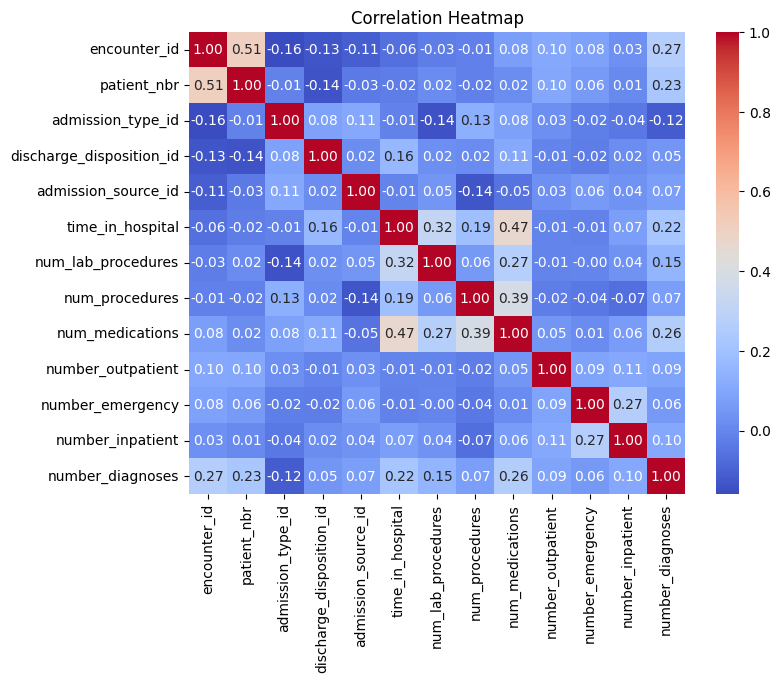

In [ ]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
for column in df[object_columns]:
    distinct_values = df[column].unique()
    print(f"Column: {column}")
    print(distinct_values)
    print("\n")

Column: race
['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']


Column: gender
['Female' 'Male' 'Unknown/Invalid']


Column: age
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']


Column: weight
['[0-25)' '[50-75)' '[75-100)' '[100-125)' '[125-150)' '[25-50)'
 '[125-100)' '[35-50)' '[175-200)' '[150-175)' '>200']


Column: diag_1
['250.83' '276' '648' '8' '197' '414' '428' '398' '434' '250.7' '157'
 '518' '999' '410' '682' '402' '737' '572' 'V57' '189' '786' '427' '996'
 '277' '584' '462' '473' '411' '174' '486' '998' '511' '432' '626' '295'
 '196' '250.6' '618' '182' '845' '423' '808' '250.4' '722' '403' '250.11'
 '784' '707' '440' '151' '715' '997' '198' '564' '812' '38' '590' '556'
 '578' '250.32' '433' 'V58' '569' '185' '536' '255' '250.13' '599' '558'
 '574' '491' '560' '244' '250.03' '577' '730' '188' '824' '250.8' '332'
 '562' '291' '296' '510' '401' '263' '438' '70' '250.02' '493' '642' '625'
 '571' '738' '593' '25

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df_encoded = pd.get_dummies(df, columns = object_columns , dtype = int)
df_encoded


,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,2278392,8222157,6,25,1,1,41,0,1,0,...,0,0,0,1,0,0,0,1,1,0
1,149190,55629189,1,1,7,3,59,0,18,0,...,0,1,0,1,0,0,1,0,0,1
2,64410,86047875,1,1,7,2,11,5,13,2,...,0,0,0,1,0,0,0,1,0,1
3,500364,82442376,1,1,7,2,44,1,16,0,...,0,1,0,1,0,0,1,0,0,1
4,16680,42519267,1,1,7,1,51,0,8,0,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,1,3,7,3,51,0,16,0,...,0,0,0,1,0,0,1,0,0,1
101762,443847782,74694222,1,4,5,5,33,3,18,0,...,1,0,0,1,0,0,0,1,0,1
101763,443854148,41088789,1,1,7,1,53,0,9,1,...,0,0,0,1,0,0,1,0,0,1
101764,443857166,31693671,2,3,7,10,45,2,21,0,...,0,1,0,1,0,0,1,0,0,1


In [ ]:
unique_patient_count = df_encoded['patient_nbr'].nunique()
unique_count = df_encoded['readmitted'].unique().tolist()

print("Unique count:", unique_count)

Unique count: ['0', '1']


In [ ]:
df_ = df_encoded#.drop(['encounter_id', 'patient_nbr', 'readmitted'], axis=1)

In [ ]:
df_

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,2278392,8222157,6,25,1,1,41,0,1,0,...,0,0,0,1,0,0,0,1,1,0
1,149190,55629189,1,1,7,3,59,0,18,0,...,0,1,0,1,0,0,1,0,0,1
2,64410,86047875,1,1,7,2,11,5,13,2,...,0,0,0,1,0,0,0,1,0,1
3,500364,82442376,1,1,7,2,44,1,16,0,...,0,1,0,1,0,0,1,0,0,1
4,16680,42519267,1,1,7,1,51,0,8,0,...,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,1,3,7,3,51,0,16,0,...,0,0,0,1,0,0,1,0,0,1
101762,443847782,74694222,1,4,5,5,33,3,18,0,...,1,0,0,1,0,0,0,1,0,1
101763,443854148,41088789,1,1,7,1,53,0,9,1,...,0,0,0,1,0,0,1,0,0,1
101764,443857166,31693671,2,3,7,10,45,2,21,0,...,0,1,0,1,0,0,1,0,0,1


In [ ]:
X= df_.drop(columns = ['readmitted', 'encounter_id', 'patient_nbr'])
y = df_['readmitted']

In [ ]:
from sklearn import preprocessing
scaled_X = preprocessing.StandardScaler().fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.20, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((81412, 2252), (20354, 2252), (81412,), (20354,))

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_prediction = lr.predict(X_test)


                precision    recall  f1-score   support

Not Readmitted       0.62      0.76      0.68     10952
    Readmitted       0.62      0.46      0.53      9402

      accuracy                           0.62     20354
     macro avg       0.62      0.61      0.61     20354
  weighted avg       0.62      0.62      0.61     20354



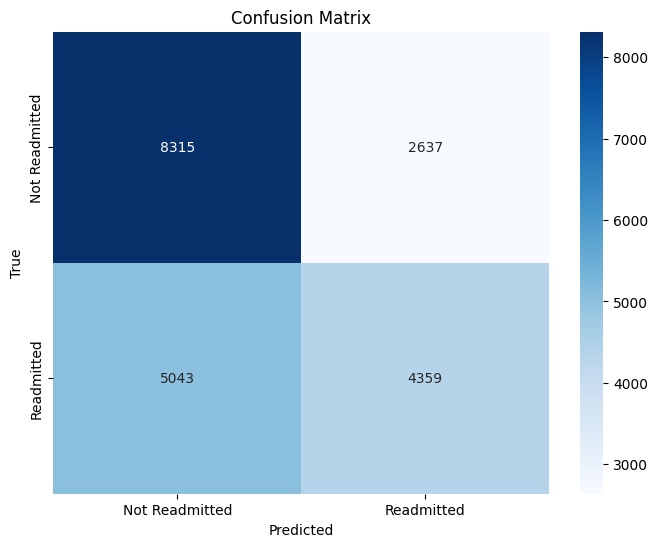

In [ ]:
print(classification_report(y_test, lr_prediction, target_names= ['Not Readmitted', 'Readmitted']))
conf_matrix = confusion_matrix(y_test, lr_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Readmitted', 'Readmitted'],
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50, max_depth=5, random_state=43)
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

                precision    recall  f1-score   support

Not Readmitted       0.56      0.95      0.71     10952
    Readmitted       0.72      0.14      0.24      9402

      accuracy                           0.58     20354
     macro avg       0.64      0.55      0.47     20354
  weighted avg       0.64      0.58      0.49     20354



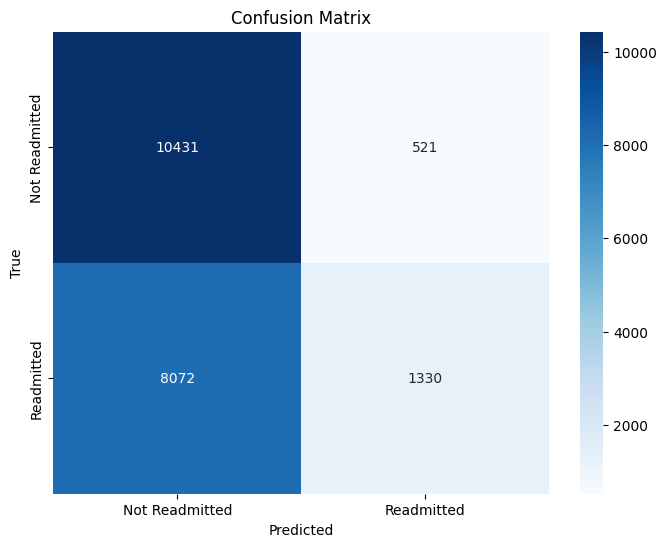

In [ ]:
print(classification_report(y_test, rf_prediction, target_names= ['Not Readmitted', 'Readmitted']))
conf_matrix = confusion_matrix(y_test, rf_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Readmitted', 'Readmitted'],
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()